In [1]:
import pandas as pd
df = pd.read_csv('Unemployment in India.csv')
print("First 5 rows of the dataset:")
print(df.head())
print("\nInformation about the dataset:")
df.info()

First 5 rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Information about the dataset:
<class 'pandas.core.

In [2]:
df.dropna(inplace=True)
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

print("Information about the cleaned dataset:")
df.info()
overall_avg_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f"\nOverall Average Unemployment Rate in India: {overall_avg_unemployment:.2f}%")

Information about the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB

Overall Average Unemployment Rate in India: 11.79%


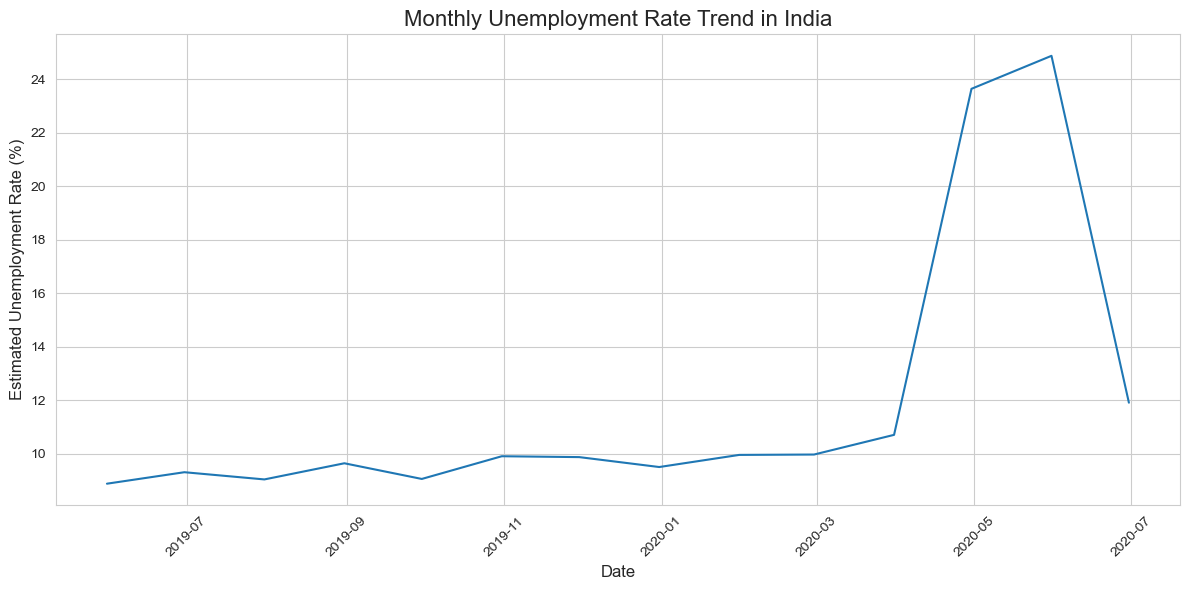

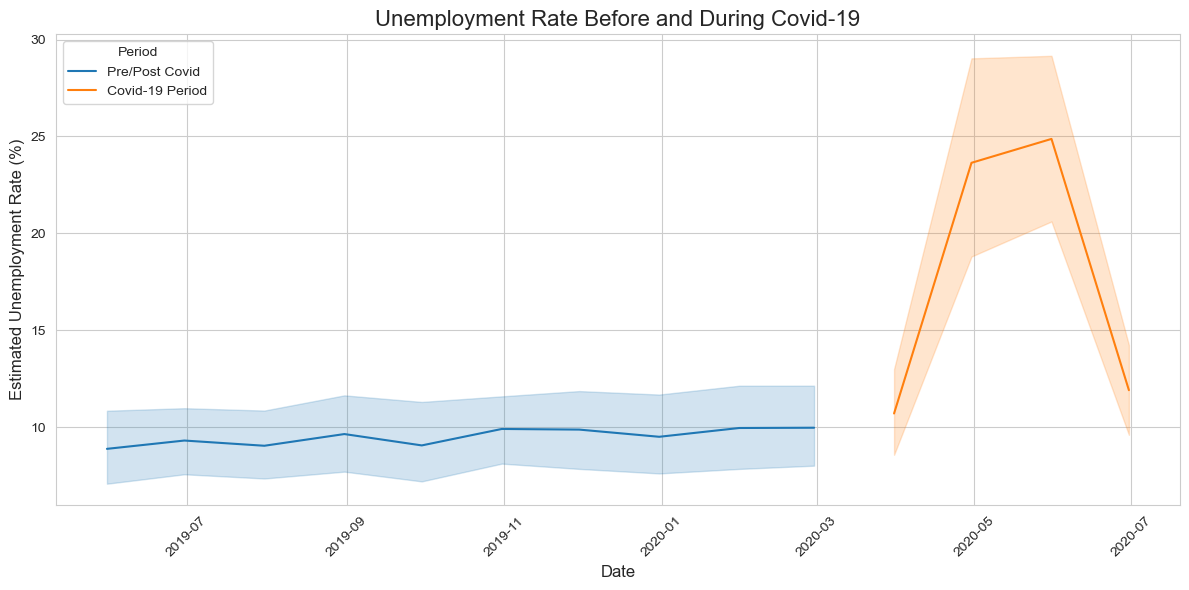


Average Unemployment Rate during Covid-19 period (Mar-Jun 2020): 17.77%
Average Unemployment Rate during non-Covid period: 9.51%


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
monthly_unemployment = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_unemployment, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('Monthly Unemployment Rate Trend in India', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_unemployment_trend.png')
plt.show()
covid_period = (df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-06-30')
df['Period'] = np.where(covid_period, 'Covid-19 Period', 'Pre/Post Covid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Period')
plt.title('Unemployment Rate Before and During Covid-19', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('unemployment_and_covid.png')
plt.show()
avg_unemployment_covid = df[df['Period'] == 'Covid-19 Period']['Estimated Unemployment Rate (%)'].mean()
avg_unemployment_non_covid = df[df['Period'] == 'Pre/Post Covid']['Estimated Unemployment Rate (%)'].mean()
print(f"\nAverage Unemployment Rate during Covid-19 period (Mar-Jun 2020): {avg_unemployment_covid:.2f}%")
print(f"Average Unemployment Rate during non-Covid period: {avg_unemployment_non_covid:.2f}%")

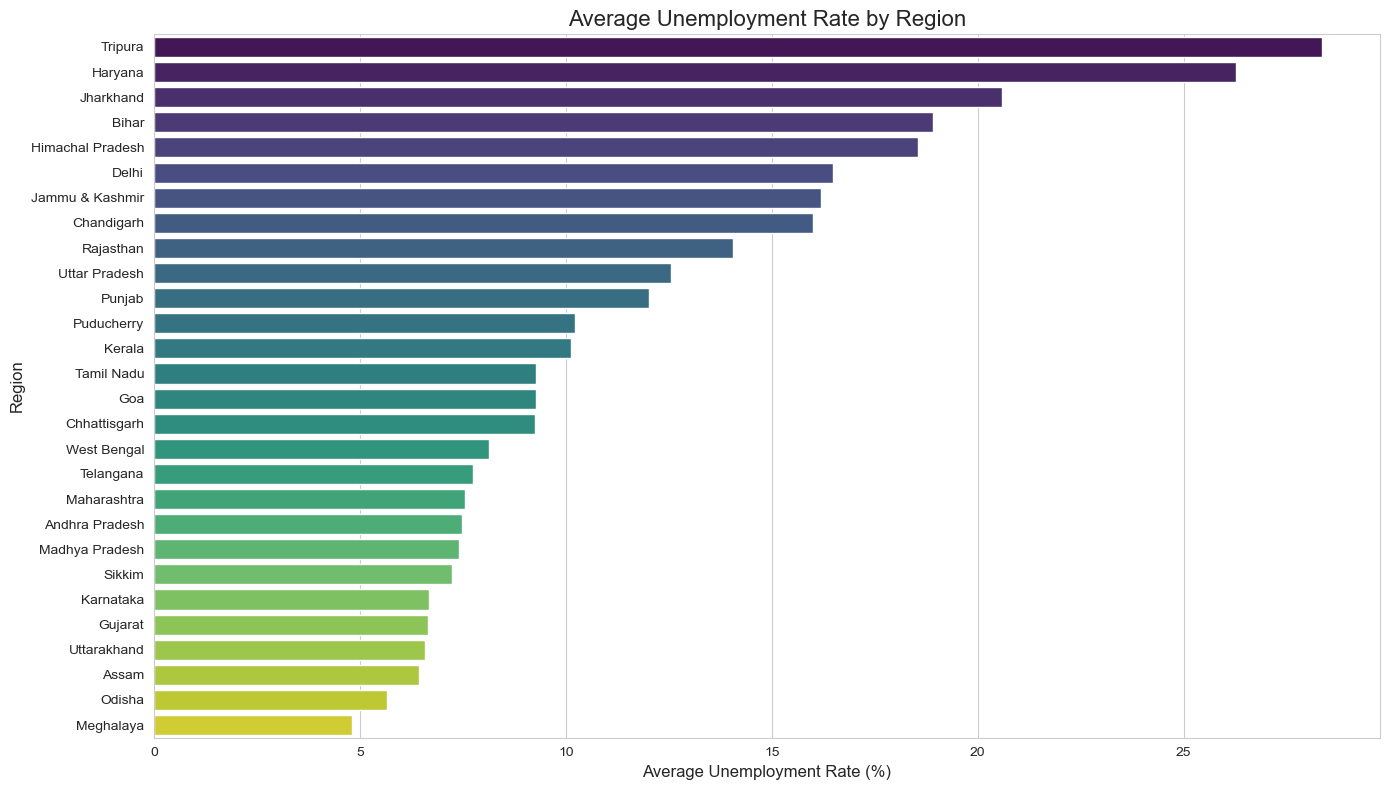

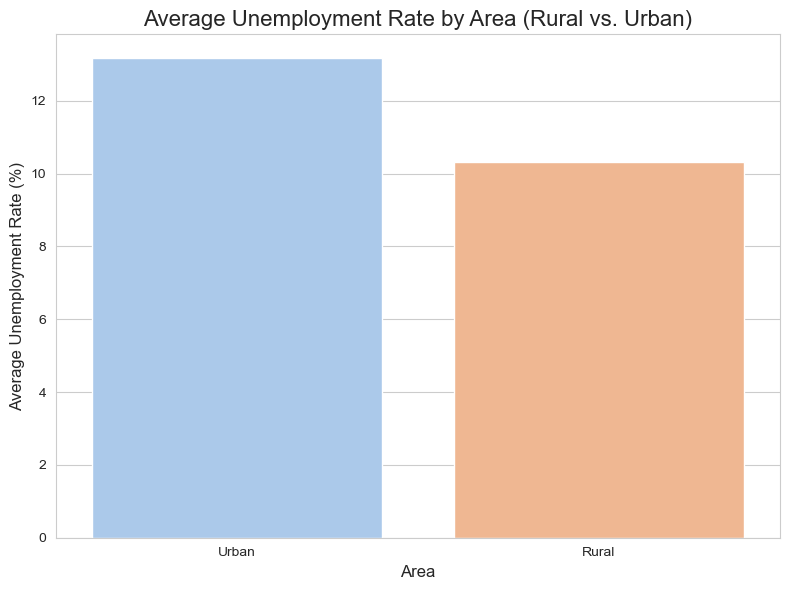


Top 5 Regions with Highest Average Unemployment Rate:
             Region  Estimated Unemployment Rate (%)
0           Tripura                        28.350357
1           Haryana                        26.283214
2         Jharkhand                        20.585000
3             Bihar                        18.918214
4  Himachal Pradesh                        18.540357

Average Unemployment Rate by Area:
    Area  Estimated Unemployment Rate (%)
0  Urban                        13.166614
1  Rural                        10.324791


In [4]:
region_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=region_unemployment, x='Estimated Unemployment Rate (%)', y='Region', hue='Region', palette='viridis', legend=False)
plt.title('Average Unemployment Rate by Region', fontsize=16)
plt.xlabel('Average Unemployment Rate (%)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.savefig('regional_unemployment.png')
plt.show()
area_unemployment = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=area_unemployment, x='Area', y='Estimated Unemployment Rate (%)', hue='Area', palette='pastel', legend=False)
plt.title('Average Unemployment Rate by Area (Rural vs. Urban)', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.tight_layout()
plt.savefig('area_unemployment.png')
plt.show()
print("\nTop 5 Regions with Highest Average Unemployment Rate:")
print(region_unemployment.head())
print("\nAverage Unemployment Rate by Area:")
print(area_unemployment)